In [130]:
#Import data processing and cleaning packages
import pandas as pd
import numpy as np
import random as rnd

#Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import machine learning algorithm related packages
from fastai.imports import *
from sklearn.tree import DecisionTreeClassifier
np.set_printoptions(linewidth=100)

In [131]:
#Load data set
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
modes = train_df.mode().iloc[0]

In [132]:
#Check data
train_df.isnull().sum() #Check for missing values in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
 #Describe data
round(train_df.describe(percentiles=[.25,.50,.60,.70,.80,.90,.99]),2)
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [134]:
cats = ["Sex","Embarked"]
conts = ['Age','SibSp','Parch','LogFare',"Pclass"]
dep = "Survived"

/Users/raymon/miniconda3/envs/d2l/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raymon/miniconda3/envs/d2l/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/raymon/miniconda3/envs/d2l/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raymon/miniconda3/envs/d2l/lib/python3.9/site-packages/seaborn/categorical.py:

[Text(0.5, 1.0, 'Histogram')]

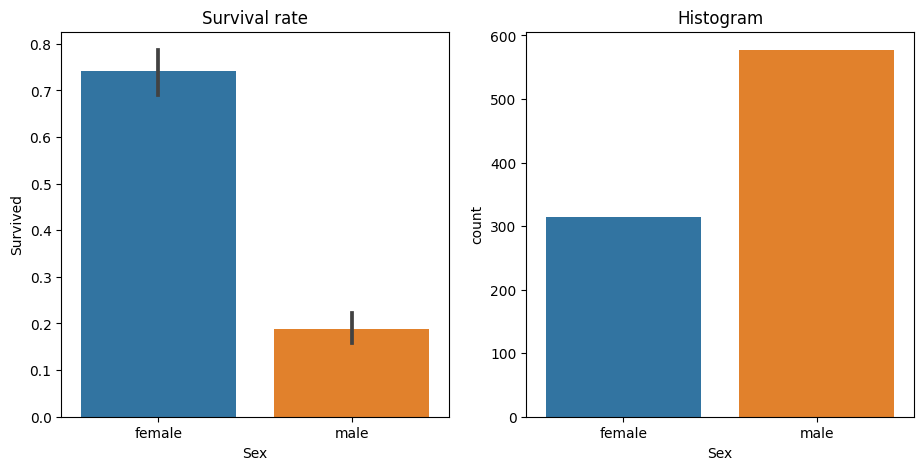

In [135]:
def proc_data(train_df):
  train_df['Fare'] = train_df.Fare.fillna(0)
  train_df.fillna(modes, inplace=True)

  train_df['LogFare'] = np.log1p(train_df['Fare'])
  train_df['Embarked'] = pd.Categorical(train_df.Embarked)
  train_df['Sex'] = pd.Categorical(train_df.Sex)

proc_data(train_df)
proc_data(test_df)

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=train_df, y=dep, x="Sex", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=train_df, x="Sex", ax=axs[1]).set(title="Histogram")

In [136]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(6100)
trn_df,val_df = train_test_split(train_df, test_size=0.25)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [137]:
def xs_y(df):
  xs = df[cats+conts].copy()
  return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [138]:
preds = val_xs.Sex==0

In [139]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.18385650224215247

/Users/raymon/miniconda3/envs/d2l/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raymon/miniconda3/envs/d2l/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raymon/miniconda3/envs/d2l/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raymon/miniconda3/envs/d2l/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ve

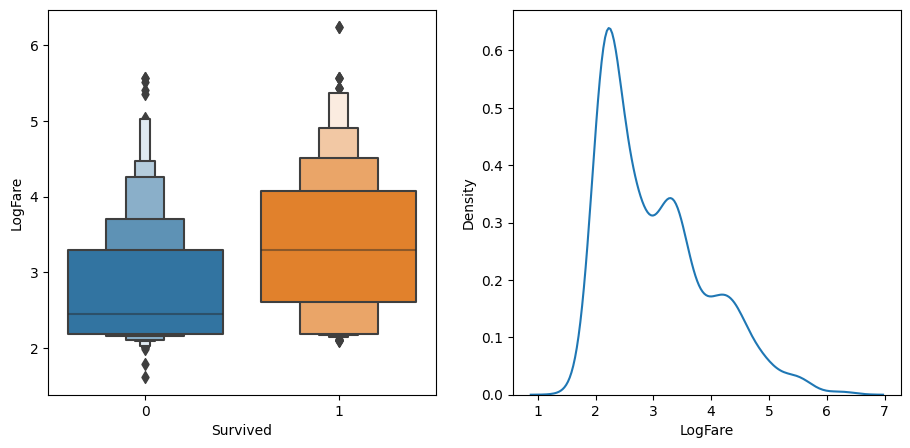

In [140]:
train_df_fare = trn_df[trn_df.LogFare>0]
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=train_df_fare, x=dep, y="LogFare", ax=axs[0])
sns.kdeplot(data=train_df_fare, x="LogFare", ax=axs[1]);

In [141]:
preds = val_xs.LogFare>2.6

In [142]:
mean_absolute_error(val_y, preds)

0.3901345291479821

In [143]:
def _side_score(side, y):
  tot = side.sum()

  if tot <= 1:
    return 0

  return y[side].std() * tot

In [144]:
def score(col, y, split):

  lhs = col <= split

  return (_side_score(lhs, y) + _side_score(~lhs, y)) / len(y)

In [145]:
score(trn_xs["Sex"], trn_y, 0.5)

0.41537513837432405

In [146]:
score(trn_xs["LogFare"], trn_y, 2.6)

0.4634161904669958

In [147]:
nm = "Age"
col = trn_xs[nm]
unq = col.unique()
unq.sort()
unq

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,
        9.  , 10.  , 11.  , 13.  , 14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  , 28.  , 28.5 , 29.  , 30.  ,
       31.  , 32.  , 32.5 , 33.  , 34.  , 34.5 , 35.  , 36.  , 37.  , 38.  , 39.  , 40.  , 40.5 ,
       41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  , 48.  , 49.  , 50.  , 51.  , 52.  ,
       53.  , 54.  , 55.  , 55.5 , 56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 71.  , 80.  ])

In [148]:
scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

6.0

In [149]:
def min_col(df, nm):
    col, y = df[nm], df[dep]
    
    unq = col.dropna().unique()
    
    scores = np.array([score(col, y, o) for o in unq if not np.isnan(o)])
    
    idx =scores.argmin()
    
    return unq[idx], scores[idx]

min_col(trn_df, "Age")

(6.0, 0.47755985540913887)

In [150]:
cols = cats+conts
{o:min_col(trn_df, o) for o in cols}

{'Sex': (0, 0.41537513837432405),
 'Embarked': (0, 0.4774088673558219),
 'Age': (6.0, 0.47755985540913887),
 'SibSp': (4, 0.48085492750455133),
 'Parch': (0, 0.48128928928540843),
 'LogFare': (2.4437981558973862, 0.45985733262941125),
 'Pclass': (2, 0.4619431919993575)}

In [151]:
cols.remove("Sex")
ismale = trn_df.Sex==1
males,females = trn_df[ismale],trn_df[~ismale]

{o:min_col(males, o) for o in cols}

{'Embarked': (0, 0.3987734212115409),
 'Age': (6.0, 0.3832024832301747),
 'SibSp': (4, 0.3980485878562532),
 'Parch': (0, 0.39542347449304477),
 'LogFare': (3.305053521109253, 0.38630980875034787),
 'Pclass': (1, 0.3884348299604776)}

In [152]:
{o:min_col(females, o) for o in cols}

{'Embarked': (0, 0.4279523449359224),
 'Age': (29.0, 0.4323296630164761),
 'SibSp': (2, 0.4256234307022214),
 'Parch': (1, 0.4347951127802823),
 'LogFare': (3.8691155044168695, 0.40895325941848665),
 'Pclass': (2, 0.372849998080021)}

In [153]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y)

In [156]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

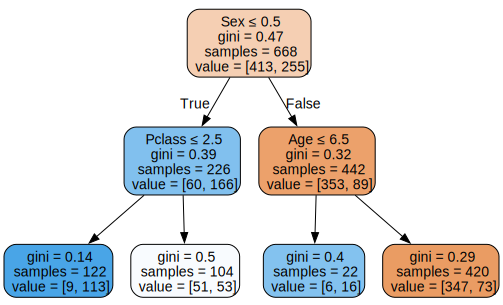

In [157]:
draw_tree(m, trn_xs, size=10)

In [162]:
def gini(cond):
    
    act = train_df.loc[cond, dep]
    
    return 1 - act.mean()**2 - (1-act).mean()**2

In [163]:
gini(train_df.Sex=='female'), gini(train_df.Sex=='male')

(0.3828350034484158, 0.3064437162277842)

In [164]:
mean_absolute_error(val_y, m.predict(val_xs))

0.19282511210762332

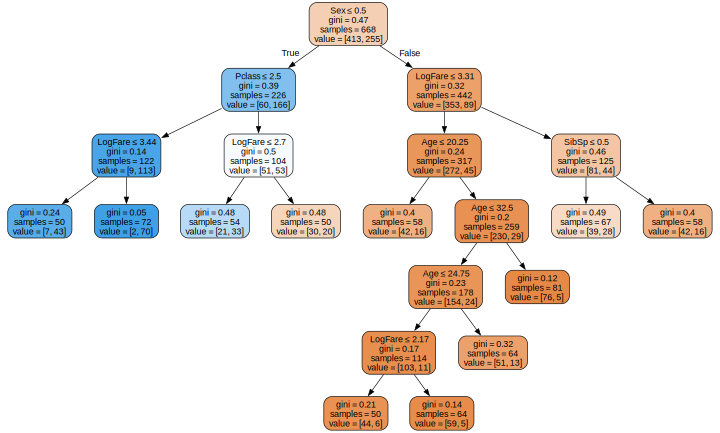

In [165]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=10)

In [166]:
mean_absolute_error(val_y, m.predict(val_xs))

0.15246636771300448